In [1]:
#Import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

C:\Users\jpinf\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\jpinf\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\jpinf\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
#Read the final Dataset after al the Pre processing Steps
roadAccidentData = pd.read_csv('Final Road Accident Dataset.csv')
roadAccidentData

,States/UTs,JUNCTION,VEHICLE AGE,HUMAN AGE AND SEX,PERSON WITHOUT SAFETY PRECAUTIONS,AREA,TYPE OF PLACE,LOAD OF VEHICLE,TRAFFIC RULES VIOLATION,WEATHER,VEHICLE TYPE AND SEX,TYPE OF ROAD,LICENSE,TIME,ACCIDENT OCCURRENCE
0,Andhra Pradesh,T-Junction,Less than 5 years,18 Yrs -Male,Drivers,Residential Area,Urban,Normally Loaded,Over-Speeding,Sunny/Clear,Pedestrian - Male,Straight Road,License Valid Permanent,06-0900hrs - (Day),YES
1,Andhra Pradesh,Y-Junction,5.1 - 10 Years,18 Yrs - Female,Passengers,Institutional Area,Rural,Overloaded/Hangin,Drunken Driving/Consumption of Alcohol & Drug,Rainy,Pedestrian - Female,Curved Road,Learner's Licence,09-1200hrs - (Day),YES
2,Andhra Pradesh,Four arm Junction,10.1 - 15 Years,18-25 Yrs - Male,Drivers,Market/Commercial Area,Urban,Others,Driving on Wrong Side,Foggy & Misty,Bycycles - Male,Bridge,Without Licence,12-1500hrs - (Day),YES
3,Andhra Pradesh,Staggered Junction,> 15 Years,18-25 Yrs - Female,Passengers,Open Area,Rural,Normally Loaded,Jumping Red Light,Hail/Sleet,Bycycles - Female,Culvert,License Valid Permanent,15-1800hrs - (Day),YES
4,Andhra Pradesh,Round about Junction,Age not known,25-35 Yrs- Male,Drivers,Residential Area,Urban,Overloaded/Hangin,Use of Mobile Phone,Others,Two Wheelers - Male,Pot Holes,Learner's Licence,18-2100hrs - (Night),YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,Puducherry,Others,5.1 - 10 Years,60 Yrs above -Female,Passengers,Open Area,Rural,Others,Drunken Driving/Consumption of Alcohol & Drug,Rainy,Trucks/Lorries - Female,Culvert,Without Licence,12-1500hrs - (Day),NO
572,Puducherry,Y-Junction,10.1 - 15 Years,Age not known - Male,Drivers,Residential Area,Urban,Normally Loaded,Driving on Wrong Side,Foggy & Misty,Buses - Male,Pot Holes,License Valid Permanent,15-1800hrs - (Day),NO
573,Puducherry,Four arm Junction,> 15 Years,Age not known - Female,Passengers,Institutional Area,Rural,Overloaded/Hangin,Jumping Red Light,Hail/Sleet,Buses - Female,Steep Grade,Learner's Licence,18-2100hrs - (Night),NO
574,Puducherry,Staggered Junction,Age not known,Age not known - Female,Passengers,Market/Commercial Area,Urban,Others,Use of Mobile Phone,Others,Other Motor Vehicles - Male,Ongoing Road Works/Under Construction,Without Licence,21-2400hrs - (Night),NO


In [3]:
#Separate the traget column and other columns
target = roadAccidentData.iloc[:,14]
accidentData = roadAccidentData.iloc[:,:14]
accidentDataDummy = roadAccidentData.iloc[:,:14]
print(accidentData)

         States/UTs              JUNCTION        VEHICLE AGE  \
0    Andhra Pradesh            T-Junction  Less than 5 years   
1    Andhra Pradesh            Y-Junction     5.1 - 10 Years   
2    Andhra Pradesh     Four arm Junction    10.1 - 15 Years   
3    Andhra Pradesh    Staggered Junction         > 15 Years   
4    Andhra Pradesh  Round about Junction      Age not known   
..              ...                   ...                ...   
571      Puducherry                Others     5.1 - 10 Years   
572      Puducherry            Y-Junction    10.1 - 15 Years   
573      Puducherry     Four arm Junction         > 15 Years   
574      Puducherry    Staggered Junction      Age not known   
575      Puducherry    Staggered Junction      Age not known   

          HUMAN AGE AND SEX PERSON WITHOUT SAFETY PRECAUTIONS   \
0              18 Yrs -Male                            Drivers   
1           18 Yrs - Female                         Passengers   
2          18-25 Yrs - Male      

In [4]:
#Use Label Encoder to convert the categorial data into Numerical data for Prediction
labelencoder = LabelEncoder()
columnsToEncode = list(accidentData.select_dtypes(include=['category','object']))
for feature in columnsToEncode:
    accidentData[feature] = labelencoder.fit_transform(accidentDataDummy[feature])

#Split the dataset into Training and Testing Data
target = pd.Series(labelencoder.fit_transform(target))
accidentData_train, accidentData_test, target_train, target_test = train_test_split(accidentData, target, test_size = 0.3)

# Create adaboost classifer object
adaboostClassifier = AdaBoostClassifier(n_estimators = 50, learning_rate = 1)

# Train Adaboost Classifer
trainedModel = adaboostClassifier.fit(accidentData_train, target_train)

#Predict the response for test dataset
target_pred = trainedModel.predict(accidentData_test)

#Printing the Accuracy
print("Accuracy:", metrics.accuracy_score(target_test, target_test))

C:\Users\jpinf\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Accuracy: 0.9479768786127167


In [30]:
import sklearn.metrics

In [31]:
print(sklearn.metrics.classification_report(target_test, target_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00        43

    accuracy                           1.00       173
   macro avg       1.00      1.00      1.00       173
weighted avg       1.00      1.00      1.00       173



In [32]:
y_pred = trainedModel.predict(accidentData_test)
y_true=target_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[125,   5],
       [  4,  39]], dtype=int64)

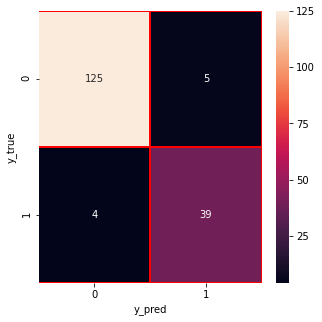

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [36]:
import numpy as np 
import pickle

In [37]:
with open('model.pickle','wb') as f:
    pickle.dump(trainedModel,f)

In [5]:
#Extracting the column index for every attribute
columnCodes = {}
for column in accidentData:
    if(column != 'ACCIDENT OCCURRENCE'):
        for i in range(0,576):
            col = accidentDataDummy[column][i]
            code = accidentData[column][i]
            if col in columnCodes.keys():
                continue
            else:
                columnCodes[col] = code
print(columnCodes)

{'Andhra Pradesh': 1, 'Arunachal Pradesh': 2, 'Assam': 3, 'Bihar': 4, 'Chhattisgarh': 6, 'Goa': 10, 'Gujarat': 11, 'Haryana': 12, 'Himachal Pradesh': 13, 'Jammu & Kashmir': 14, 'Jharkhand': 15, 'Karnataka': 16, 'Kerala': 17, 'Madhya Pradesh': 19, 'Maharashtra': 20, 'Manipur': 21, 'Meghalaya': 22, 'Mizoram': 23, 'Nagaland': 24, 'Orissa': 25, 'Punjab': 27, 'Rajasthan': 28, 'Sikkim': 29, 'Tamil Nadu': 30, 'Telangana': 31, 'Tripura': 32, 'Uttarakhand': 34, 'Uttar Pradesh': 33, 'West Bengal': 35, 'A & N Islands': 0, 'Chandigarh': 5, 'D & N Haveli': 7, 'Daman & Diu': 8, 'Delhi': 9, 'Lakshadweep': 18, 'Puducherry': 26, 'T-Junction': 4, 'Y-Junction': 5, 'Four arm Junction': 0, 'Staggered Junction': 3, 'Round about Junction': 2, 'Others': 1, 'Less than 5 years': 4, '5.1 - 10 Years': 1, '10.1 - 15 Years': 0, '> 15 Years': 2, 'Age not known': 3, '18 Yrs -Male': 1, '18 Yrs - Female': 0, '18-25 Yrs - Male': 3, '18-25 Yrs - Female': 2, '25-35 Yrs- Male': 5, '25-35 Yrs - Female': 4, '35-40 Yrs- Male'

In [6]:
testData1 = {'States/UTs':['Kerala'],
             'JUNCTION':['Four arm Junction'],
             'VEHICLE AGE':['> 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Residential Area'],
             'TYPE OF PLACE':['Urban'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Hail/Sleet'],
             'VEHICLE TYPE AND SEX':['Cars & taxies Vans & LMV - Male'],
             'TYPE OF ROAD':['Straight Road'],
             'LICENSE':['Without Licence'],
             'TIME':['Unknown Time']}

In [7]:
#Now the test values are compared with the Column Codes and store them
for col in testData1:
    code = [columnCodes[''.join(testData1[col])]]
    testData1[col] = code
print(testData1)

testDataFrame = pd.DataFrame.from_dict(testData1)
print(testDataFrame)

{'States/UTs': [17], 'JUNCTION': [0], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [1], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [8]}
   States/UTs  JUNCTION  VEHICLE AGE  HUMAN AGE AND SEX  \
0          17         0            2                  9   

   PERSON WITHOUT SAFETY PRECAUTIONS  AREA  TYPE OF PLACE  LOAD OF VEHICLE  \
0                                  0     3              1                1   

   TRAFFIC RULES VIOLATION  WEATHER  VEHICLE TYPE AND SEX  TYPE OF ROAD  \
0                        2        1                     7             7   

   LICENSE  TIME  
0        2     8  


In [8]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


In [9]:
testData2 = {'States/UTs':['Chhattisgarh'],
             'JUNCTION':['Staggered Junction'],
             'VEHICLE AGE':['> 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Passengers'],
             'AREA':['Residential Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Hail/Sleet'],
             'VEHICLE TYPE AND SEX':['Other Motor Vehicles - Female'],
             'TYPE OF ROAD':['Others'],
             'LICENSE':['Without Licence'],
             'TIME':['Unknown Time']}

In [10]:
#Now the test values are compared with the Column Codes and store them
for col in testData2:
    code = [columnCodes[''.join(testData2[col])]]
    testData2[col] = code
print(testData2)
testDataFrame = pd.DataFrame.from_dict(testData2)

{'States/UTs': [6], 'JUNCTION': [3], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [1], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [2], 'TIME': [8]}


In [11]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


In [12]:
testData3 = {'States/UTs':['Puducherry'],
             'JUNCTION':['Staggered Junction'],
             'VEHICLE AGE':['> 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Passengers'],
             'AREA':['Residential Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Hail/Sleet'],
             'VEHICLE TYPE AND SEX':['Other Motor Vehicles - Female'],
             'TYPE OF ROAD':['Others'],
             'LICENSE':['Without Licence'],
             'TIME':['Unknown Time']}

In [13]:
#Now the test values are compared with the Column Codes and store them
for col in testData3:
    code = [columnCodes[''.join(testData3[col])]]
    testData3[col] = code
print(testData3)
testDataFrame = pd.DataFrame.from_dict(testData3)

{'States/UTs': [26], 'JUNCTION': [3], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [1], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [2], 'TIME': [8]}


In [14]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


In [15]:
testData4 = {'States/UTs':['Lakshadweep'],
             'JUNCTION':['Staggered Junction'],
             'VEHICLE AGE':['10.1 - 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Institutional Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Others'],
             'VEHICLE TYPE AND SEX':['Other Motor Vehicles - Female'],
             'TYPE OF ROAD':['Others'],
             'LICENSE':['License Valid Permanent'],
             'TIME':['00-300hrs - (Night)']}

In [16]:
#Now the test values are compared with the Column Codes and store them
for col in testData4:
    code = [columnCodes[''.join(testData4[col])]]
    testData4[col] = code
print(testData4)
testDataFrame = pd.DataFrame.from_dict(testData4)

{'States/UTs': [18], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [17]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


In [18]:
testData5 = {'States/UTs':['Delhi'],
             'JUNCTION':['Staggered Junction'],
             'VEHICLE AGE':['10.1 - 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Institutional Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Others'],
             'VEHICLE TYPE AND SEX':['Other Motor Vehicles - Female'],
             'TYPE OF ROAD':['Others'],
             'LICENSE':['License Valid Permanent'],
             'TIME':['00-300hrs - (Night)']}

In [19]:
#Now the test values are compared with the Column Codes and store them
for col in testData5:
    code = [columnCodes[''.join(testData5[col])]]
    testData5[col] = code
print(testData5)
testDataFrame = pd.DataFrame.from_dict(testData5)

{'States/UTs': [9], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [20]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


In [21]:
testData6 = {'States/UTs':['Uttar Pradesh'],
             'JUNCTION':['Staggered Junction'],
             'VEHICLE AGE':['10.1 - 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Institutional Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Others'],
             'VEHICLE TYPE AND SEX':['Other Motor Vehicles - Female'],
             'TYPE OF ROAD':['Others'],
             'LICENSE':['License Valid Permanent'],
             'TIME':['00-300hrs - (Night)']}

In [22]:
#Now the test values are compared with the Column Codes and store them
for col in testData6:
    code = [columnCodes[''.join(testData6[col])]]
    testData6[col] = code
print(testData6)
testDataFrame = pd.DataFrame.from_dict(testData6)

{'States/UTs': [33], 'JUNCTION': [3], 'VEHICLE AGE': [0], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [0], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [8], 'TYPE OF ROAD': [1], 'LICENSE': [1], 'TIME': [0]}


In [23]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

Yes, there is a chance of Accident


In [24]:
testData7 = {'States/UTs':['A & N Islands'],
             'JUNCTION':['Four arm Junction'],
             'VEHICLE AGE':['> 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Residential Area'],
             'TYPE OF PLACE':['Urban'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Jumping Red Light'],
             'WEATHER':['Hail/Sleet'],
             'VEHICLE TYPE AND SEX':['Cars & taxies Vans & LMV - Male'],
             'TYPE OF ROAD':['Straight Road'],
             'LICENSE':['Without Licence'],
             'TIME':['Unknown Time']}

In [25]:
#Now the test values are compared with the Column Codes and store them
for col in testData7:
    code = [columnCodes[''.join(testData7[col])]]
    testData7[col] = code
print(testData7)
testDataFrame = pd.DataFrame.from_dict(testData7)

{'States/UTs': [0], 'JUNCTION': [0], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [1], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [2], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [8]}


In [26]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe


In [27]:
testData8 = {'States/UTs':['Orissa'],
             'JUNCTION':['Round about Junction'],
             'VEHICLE AGE':['> 15 Years'],
             'HUMAN AGE AND SEX':['45-60 Yrs- Male'],
             'PERSON WITHOUT SAFETY PRECAUTIONS':['Drivers'],
             'AREA':['Residential Area'],
             'TYPE OF PLACE':['Rural'],
             'LOAD OF VEHICLE':['Others'],
             'TRAFFIC RULES VIOLATION':['Over-Speeding'],
             'WEATHER':['Hail/Sleet'],
             'VEHICLE TYPE AND SEX':['Cars & taxies Vans & LMV - Male'],
             'TYPE OF ROAD':['Straight Road'],
             'LICENSE':['Without Licence'],
             'TIME':['18-2100hrs - (Night)']}

In [28]:
#Now the test values are compared with the Column Codes and store them
for col in testData8:
    code = [columnCodes[''.join(testData8[col])]]
    testData8[col] = code
print(testData8)
testDataFrame = pd.DataFrame.from_dict(testData8)

{'States/UTs': [25], 'JUNCTION': [2], 'VEHICLE AGE': [2], 'HUMAN AGE AND SEX': [9], 'PERSON WITHOUT SAFETY PRECAUTIONS': [0], 'AREA': [3], 'TYPE OF PLACE': [0], 'LOAD OF VEHICLE': [1], 'TRAFFIC RULES VIOLATION': [3], 'WEATHER': [1], 'VEHICLE TYPE AND SEX': [7], 'TYPE OF ROAD': [7], 'LICENSE': [2], 'TIME': [6]}


In [29]:
predictionValue = trainedModel.predict(testDataFrame)
if(predictionValue == 1):
    print("Yes, there is a chance of Accident")
else:
    print("No, it is safe")

No, it is safe
